[[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  2.72900000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.92830000e+02   4.03000000e+00]
 ..., 
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  1.09590000e-01   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.93450000e+02   6.48000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
14


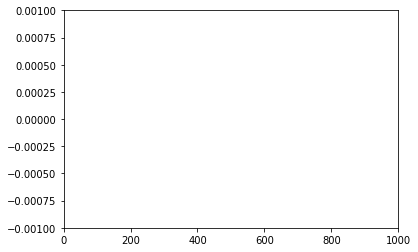

nan
MSE: nan


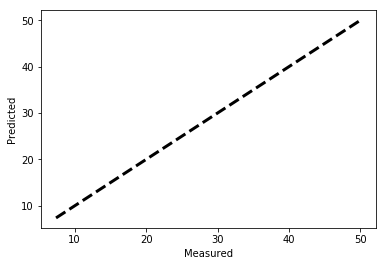

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np
from numpy import genfromtxt
from sklearn.datasets import load_boston

def read_datasetr(filePath, delimiter=','):
    return  genfromtxt(filePath, delimiter=delimiter)

def read_boston_data():
    boston = load_boston()
    features =np.array(boston.data)
    labels = np.array(boston.target)
    return features, labels

def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma

def append_bias_reshape(featurs, labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples), features], [n_training_samples, n_dim +1])
    l = np.reshape(labels, [n_training_samples, 1])
    return f, l
print(load_boston().data)
features, labels = read_boston_data()
normalized_featues = feature_normalize(features)

f,l = append_bias_reshape(normalized_featues, labels)
n_dim = f.shape[1]
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
X = tf.placeholder(tf.float32, [None, n_dim])
Y = tf.placeholder(tf.float32, [None, 1])
W = tf.Variable(tf.ones([n_dim, 1]))
print(n_dim)
init = tf.global_variables_initializer()

y_ = tf.matmul(X,W)
cost = tf.reduce_mean(tf.square(y_ - Y))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={X:train_x, Y:train_y})
    cost_history = np.append(cost_history, sess.run(cost, feed_dict={X: train_x, Y: train_y}))

plt.plot(range(len(cost_history)), cost_history)
plt.axis([0, training_epochs, 0, np.max(cost_history)])
plt.show()
print(np.max(cost_history))

pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse))

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()